In [1]:
from pymongo import MongoClient
import pandas as pd
import threading
import os
import requests
import BeautifulSoup
from BeautifulSoup import BeautifulSoup
db=MongoClient('10.247.69.18').crowd

In [2]:
cursor = db['gofundme'].find(limit =2000).sort("_id", -1)
df =  pd.DataFrame(list(cursor))
df=df[~(df.text.str[0:4]=='RT @')]
df=df[df.created_at.str.contains('Jan 02')]
df['url']=df.entities.apply(lambda x:x['urls'][0]['expanded_url'] if len(x['urls'])>0 else None)
df['url']=df.url.apply(lambda x:str(x).split('?')[0])
df['url']=df.url.apply(lambda x:str(x).split('&')[0])
df=df[df.url.str.contains('gofund.me')]
df['user']=df.user.apply(lambda x:x['screen_name'])

In [22]:
dg=df.groupby(['user', 'url']).count().reset_index()
urls=dg.url.tolist()
#all=[]
for url in urls[20:30]:
    headers = {'content-type': 'application/json'}
    response=requests.post(url, headers=headers)
    soup = BeautifulSoup(response.text)
    links = soup.find("div", { "class" : "cbdate" })
    try: 
        if links.text.strip('Created ')=='January 1, 2016':
            share=soup.find("div", { "id" : "top-share-bar" })['data-total_shares']
            people=soup.find("div", { "class" : "time " }).text.strip('Raised by').split('person')[0].split('people')[0]
            money=soup.find("div", { "class" : "raised " }).text.split('of')[0]
            all.append( [url, share,people, money])
    except:
        pass

In [23]:
camps=pd.DataFrame(all,columns=['url','share','people','money'])

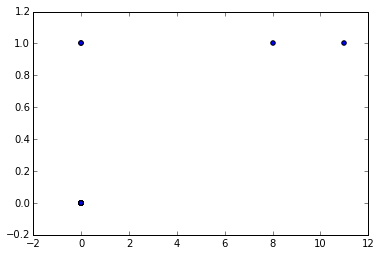

In [25]:
%matplotlib inline  
import matplotlib.pylab as plt
plt.scatter(camps.share.tolist(), camps.people.tolist())

In [28]:
camps['share']=camps.share.astype(int)
camps['people']=camps.people.astype(int)

In [29]:
camps.corr()

,share,people
share,1.000000,0.641285
people,0.641285,1.000000


In [7]:
import urllib2
all=[]
url_df=pd.read_csv('jan01/url.csv',header=None, names=['url'])
for url in url_df.url:
    print  url
    try: 
        page = urllib2.urlopen(url)
        page_content = page.read()
        soup = BeautifulSoup(page_content)
        links = soup.find("div", { "class" : "cbdate" })
        #if links.text.strip('Created ')=='January 1, 2016':
        page=url.split('gofund.me/')[1]
        print page
        with open('jan03/'+page+'.html', 'w') as fid:
            fid.write(page_content) 
        #with open("url.csv", "a") as url_csv:
            #url_csv.write(url+'\n')    
    except Exception,e: 
        print str(e)
        pass

http://tw.gofund.me/7wh2sqdg
7wh2sqdg
[Errno 2] No such file or directory: 'jan03/7wh2sqdg.html'
http://tw.gofund.me/pbh5dx78
pbh5dx78
[Errno 2] No such file or directory: 'jan03/pbh5dx78.html'
https://gofund.me/86h52wgs
86h52wgs
[Errno 2] No such file or directory: 'jan03/86h52wgs.html'
http://tw.gofund.me/wph5jvnw
wph5jvnw
[Errno 2] No such file or directory: 'jan03/wph5jvnw.html'
https://gofund.me/5gh5gjyk
5gh5gjyk
[Errno 2] No such file or directory: 'jan03/5gh5gjyk.html'
https://gofund.me/pwh4uxvw
pwh4uxvw
[Errno 2] No such file or directory: 'jan03/pwh4uxvw.html'
http://tw.gofund.me/q7h5u9jg
q7h5u9jg
[Errno 2] No such file or directory: 'jan03/q7h5u9jg.html'
https://gofund.me/9sh4xgws
9sh4xgws
[Errno 2] No such file or directory: 'jan03/9sh4xgws.html'
http://tw.gofund.me/5ph5r8ms
5ph5r8ms
[Errno 2] No such file or directory: 'jan03/5ph5r8ms.html'
http://tw.gofund.me/7sh5kkrp
7sh5kkrp
[Errno 2] No such file or directory: 'jan03/7sh5kkrp.html'
http://tw.gofund.me/5ph5r8ms
5ph5r8ms
